<a href="https://colab.research.google.com/github/kokoichi206/is_someone/blob/main/cnn_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip uninstall keras -y
!pip uninstall keras-nightly -y
!pip uninstall keras-Preprocessing -y
!pip uninstall keras-vis -y
!pip uninstall tensorflow -y

!pip install tensorflow==2.3.0
!pip install keras==2.4

Uninstalling Keras-2.4.0:
  Successfully uninstalled Keras-2.4.0
Uninstalling Keras-Preprocessing-1.1.2:
  Successfully uninstalled Keras-Preprocessing-1.1.2
Uninstalling tensorflow-2.3.0:
  Successfully uninstalled tensorflow-2.3.0
  Using cached https://files.pythonhosted.org/packages/16/89/f2d29c2eafc2eeafb17d5634340e06366af904d332341200a49d954bce85/tensorflow-2.3.0-cp37-cp37m-manylinux2010_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/79/4c/7c3275a01e12ef9368a892926ab932b33bb13d55794881e3573482b378a7/Keras_Preprocessing-1.1.2-py2.py3-none-any.whl


  Using cached https://files.pythonhosted.org/packages/b6/19/9d8f1c86c09d05369da39b03d011cd689edef86c0e6b2777dbcedc49dfc6/Keras-2.4.0-py2.py3-none-any.whl


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np

datasets = np.load("drive/My Drive/Colab Notebooks/ml_2021/dataset/dataset.npz")

x_train = datasets['X_train']
x_test = datasets['X_test']
t_train = datasets['y_train']
t_test = datasets['y_test']

In [ ]:
print(len(x_train))
print(len(t_test))
print(len(x_train[0]))
print(len(t_train[0]))

424
209
50
2


In [ ]:
print(x_train[0])
print(t_train[0])
# x_train[0]

[[[0.00392157 0.         0.        ]
  [0.00392157 0.         0.        ]
  [0.00392157 0.         0.        ]
  ...
  [0.         0.01568628 0.        ]
  [0.         0.00392157 0.        ]
  [0.         0.00392157 0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.         0.01176471 0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.         0.00392157 0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 ...

 [[0.         0.         0.01960784]
  [0.14901961 0.16862746 0.18431373]
  [0.6862745  0.7058824  0.72156864]
  ...
  [0.84705883 0.9254902  0.9607843 ]
  [0.827451   0.8862745  0.90588236]
  [0.81960785 0.8784314  0.8980392 ]]

 [[0.00392157 0.00784314 0.02352941]
  [0.15686275 0.17254902 0.18431373]


In [ ]:
import tensorflow
import keras
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


batch_size = 32
epochs = 150
n_class = 2

# t_train = to_categorical(t_train, n_class)  # one-hot表現に
# t_test = to_categorical(t_test, n_class)

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))  # ゼロパディング、バッチサイズ以外の画像の形状を指定
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # 一次元の配列に変換
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))  # ドロップアウト
model.add(Dense(n_class))
model.add(Activation('softmax'))

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_100 (Conv2D)          (None, 50, 50, 32)        896       
_________________________________________________________________
activation_108 (Activation)  (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_109 (Activation)  (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 24, 24, 64)        18496     
_________________________________________________________________
activation_110 (Activation)  (None, 24, 24, 64)      

In [ ]:
# x_train = x_train / 255  # 0から1の範囲に収める
# x_test = x_test / 255

generator = ImageDataGenerator(
           rotation_range=0.2,
           width_shift_range=0.2,
           height_shift_range=0.2,
           shear_range=1,
           zoom_range=0.2,
           horizontal_flip=True)
generator.fit(x_train)

history = model.fit(generator.flow(x_train, t_train, batch_size=batch_size),
                              epochs=epochs,
                              validation_data=(x_test, t_test))


Epoch 1/150
14/14 [==============================] - 3s 85ms/step - loss: 0.6931 - accuracy: 0.4757 - val_loss: 0.6874 - val_accuracy: 0.5885
Epoch 2/150
14/14 [==============================] - 0s 35ms/step - loss: 0.6863 - accuracy: 0.5494 - val_loss: 0.6831 - val_accuracy: 0.5885
Epoch 3/150
14/14 [==============================] - 0s 34ms/step - loss: 0.6801 - accuracy: 0.5959 - val_loss: 0.6833 - val_accuracy: 0.5885
Epoch 4/150
14/14 [==============================] - 0s 32ms/step - loss: 0.6796 - accuracy: 0.6148 - val_loss: 0.6805 - val_accuracy: 0.5885
Epoch 5/150
14/14 [==============================] - 0s 32ms/step - loss: 0.6779 - accuracy: 0.5996 - val_loss: 0.6779 - val_accuracy: 0.5885
Epoch 6/150
14/14 [==============================] - 0s 34ms/step - loss: 0.6790 - accuracy: 0.5855 - val_loss: 0.6771 - val_accuracy: 0.5885
Epoch 7/150
14/14 [==============================] - 0s 34ms/step - loss: 0.6713 - accuracy: 0.6120 - val_loss: 0.6758 - val_accuracy: 0.5885
Epoch 

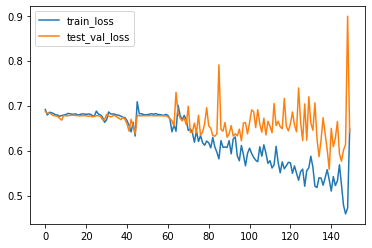

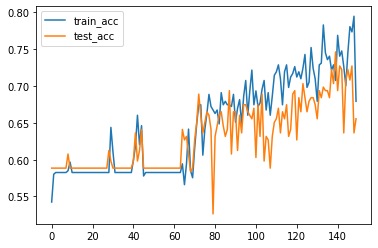

In [ ]:
import matplotlib.pyplot as plt

train_loss = history.history['loss'] 
train_acc = history.history['accuracy'] 
val_loss = history.history['val_loss'] 
val_acc = history.history['val_accuracy'] 

plt.plot(np.arange(len(train_loss)), train_loss, label='train_loss')
plt.plot(np.arange(len(val_loss)), val_loss, label='test_val_loss')
plt.legend()
plt.show()

plt.plot(np.arange(len(train_acc)), train_acc, label='train_acc')
plt.plot(np.arange(len(val_acc)), val_acc, label='test_acc')
plt.legend()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(x_test, t_test)
print(loss, accuracy)

7/7 [==============================] - 0s 5ms/step - loss: 1.1478 - accuracy: 0.8373
1.1477946043014526 0.8373205661773682


In [ ]:
from google.colab import files

# 「include_optimizer=false」 = 推論用のデータのみ
model.save("image_classifier.h5",  include_optimizer=False)
files.download("image_classifier.h5")